In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import datetime
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
spacy.util.fix_random_seed(0)
np.random.seed(0)
random.seed(0)

In [240]:
df = pd.read_csv("C:/Users/savil/Downloads/trump_insult_tweets_2014_to_2021.csv/trump_insult_tweets_2014_to_2021.csv")

In [241]:
df.head() # Already laughing

Unnamed: 0        date          target  \
0           1  2014-10-09  thomas-frieden   
1           2  2014-10-09  thomas-frieden   
2           3  2015-06-16     politicians   
3           4  2015-06-24      ben-cardin   
4           5  2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  
0  Can you believe this fool, Dr. Thomas Frieden ...  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  
3  Politician @SenatorCardin didn't like that I s...  
4  For the nonbeliever, here is a photo of @Neily...

In [136]:
df.columns

Index(['Unnamed: 0', 'date', 'target', 'insult', 'tweet'], dtype='object')

In [137]:
df.shape # No way he actually insulted someone online 10360 times???

(10360, 5)

In [242]:
df.drop_duplicates(subset = ['tweet']).shape

(5673, 5)

In [243]:
df.head()

Unnamed: 0        date          target  \
0           1  2014-10-09  thomas-frieden   
1           2  2014-10-09  thomas-frieden   
2           3  2015-06-16     politicians   
3           4  2015-06-24      ben-cardin   
4           5  2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  
0  Can you believe this fool, Dr. Thomas Frieden ...  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  
3  Politician @SenatorCardin didn't like that I s...  
4  For the nonbeliever, here is a photo of @Neily...

In [244]:
df.shape

(10360, 5)

In [253]:
df.head()

Unnamed: 0        date          target  \
0           1  2014-10-09  thomas-frieden   
1           2  2014-10-09  thomas-frieden   
2           3  2015-06-16     politicians   
3           4  2015-06-24      ben-cardin   
4           5  2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  
0  Can you believe this fool, Dr. Thomas Frieden ...  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  
3  Politician @SenatorCardin didn't like that I s...  
4  For the nonbeliever, here is a photo of @Neily...

In [254]:
df.shape

(10360, 5)

In [255]:
df.describe()

Unnamed: 0
count  10360.000000
mean    5180.500000
std     2990.818728
min        1.000000
25%     2590.750000
50%     5180.500000
75%     7770.250000
max    10360.000000

In [256]:
df.isnull().sum()

Unnamed: 0    0
date          0
target        2
insult        0
tweet         0
dtype: int64

In [257]:
df = (df.drop(df.columns[0], axis = 1,)).dropna()

In [258]:
df.isnull().sum()

date      0
target    0
insult    0
tweet     0
dtype: int64

In [259]:
df.dtypes

date      object
target    object
insult    object
tweet     object
dtype: object

In [260]:
df['target'].value_counts() # seems he hates the media the most

the-media           1287
democrats            647
hillary-clinton      625
trump-russia         441
joe-biden            402
                    ... 
dnc                    1
emmanuel-macron        1
neil-young             1
virginia-economy       1
katie-rogers           1
Name: target, Length: 866, dtype: int64

<AxesSubplot:>

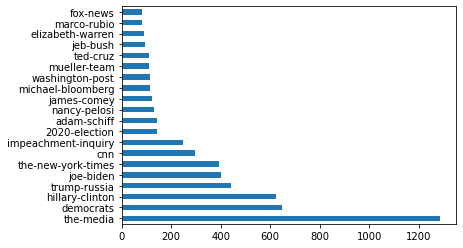

In [261]:
df['target'].value_counts().nlargest(20).plot(kind = 'barh')

<AxesSubplot:>

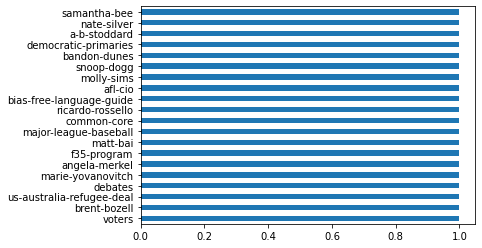

In [262]:
df['target'].value_counts().nsmallest(20).plot(kind = 'barh')

In [263]:
df['target'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10355    False
10356    False
10357    False
10358    False
10359    False
Name: target, Length: 10358, dtype: bool

In [264]:
df['insult'].value_counts()

Fake News                                         430
Crooked                                           266
Sleepy Joe                                        129
failing                                            82
Crooked Hillary                                    77
                                                 ... 
18 VERY ANGRY Democrats                             1
They are only getting more deranged with time!      1
Always speaks badly of his many bosses              1
a very Low IQ individual                            1
has BAD JUDGEMENT                                   1
Name: insult, Length: 6728, dtype: int64

<AxesSubplot:>

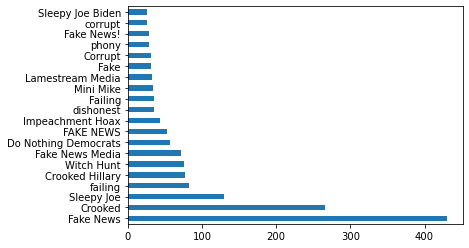

In [265]:
df['insult'].value_counts().nlargest(20).plot(kind = 'barh')

<AxesSubplot:>

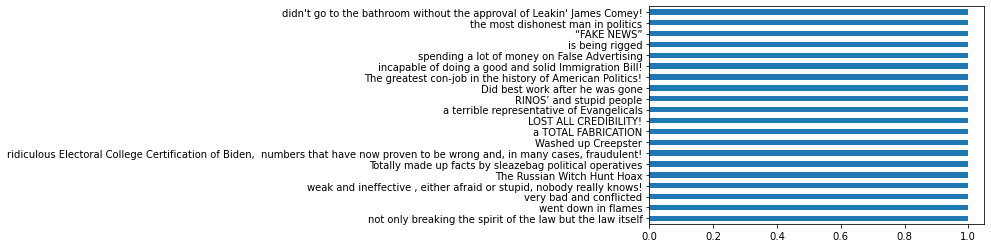

In [266]:
df['insult'].value_counts().nsmallest(20).plot(kind = 'barh')

### Most frequent words in tweets

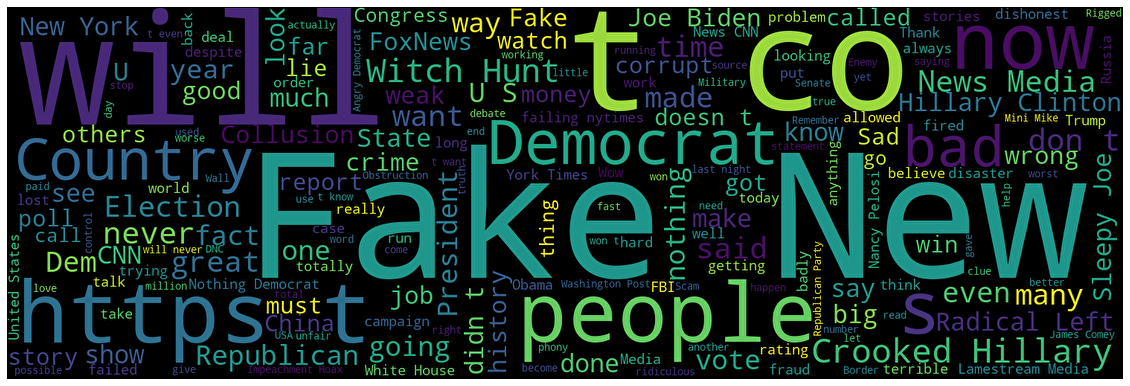

In [267]:
tweettxt = " ".join(df.tweet)

wordcloud = WordCloud(width = 1500, height = 500).generate(tweettxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show() # I used to think NLP was overrated, but this is actually pretty cool.

### His Targets vizualised

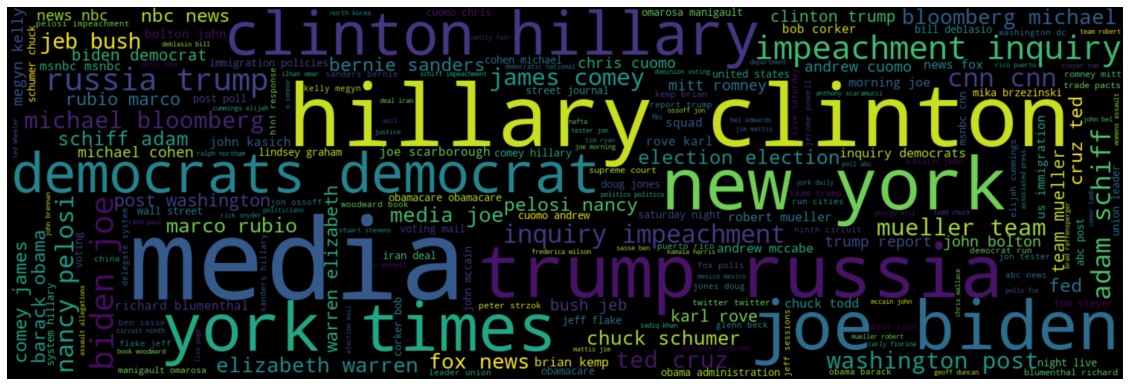

In [268]:
targettxt = " ".join(df.target)

wordcloud = WordCloud(width = 1500, height = 500).generate(targettxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'gaussian') 
plt.axis("off")
plt.show() 
# Interesting how these tweets span about 7 years and Biden became a big target despite only feuding a year or two ago
# He really hated Clinton... NYT too for that matter...

In [269]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)
df.head()

datetime64[ns]


date          target  \
0 2014-10-09  thomas-frieden   
1 2014-10-09  thomas-frieden   
2 2015-06-16     politicians   
3 2015-06-24      ben-cardin   
4 2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  
0  Can you believe this fool, Dr. Thomas Frieden ...  
1  Can you believe this fool, Dr. Thomas Frieden ...  
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  
3  Politician @SenatorCardin didn't like that I s...  
4  For the nonbeliever, here is a photo of @Neily...

C:\Users\savil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

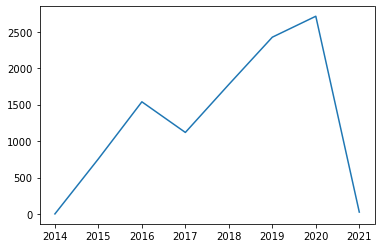

In [270]:
df['year'] = df['date'].dt.year
insults_over_years = df['year'].value_counts()
sns.lineplot(insults_over_years.index, insults_over_years.values)

C:\Users\savil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


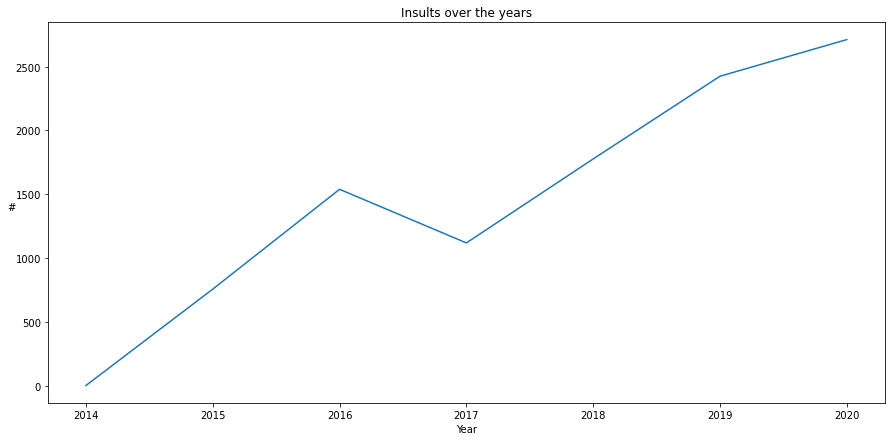

In [271]:
plt.figure(figsize = (15,7))
df['year'] = df['date'].dt.year
insults_over_years = df['year'].value_counts().drop(2021)
sns.lineplot(insults_over_years.index, insults_over_years.values)
plt.title("Insults over the years")
plt.xlabel("Year")
plt.ylabel("#", rotation = 0)
plt.show()
# As time went on, so did the anger

In [272]:
nlp = spacy.blank("en")

textcat = nlp.create_pipe(
"textcat",
config = {
    "exclusive_classes": True,
    "architecture": "bow"})
nlp.add_pipe(textcat)

In [273]:
labels = np.unique(df['year'].values).tolist()
labels = [textcat.add_label(str(label)) for label in labels]

In [274]:
train_text = df['tweet'].values
train_label = [{'cats': {'2014': label == '2014',
                        '2015': label == '2015',
                        '2016': label == '2016',
                        '2017': label == '2017',
                        '2018': label == '2018',
                        '2019': label == '2019',
                        '2020': label == '2020',
                        '2021': label == '2021'}} for label in df['year']]

train_data = list(zip(train_text, train_label))
train_data[20]

('.@NYDailyNews, the dying tabloid owned by dopey clown Mort Zuckerman, puts me on the cover daily because I sell. My honor, but it is dead!',
 {'cats': {'2014': False,
   '2015': False,
   '2016': False,
   '2017': False,
   '2018': False,
   '2019': False,
   '2020': False,
   '2021': False}})

In [27]:
optimizer = nlp.begin_training()

losses = {}
for epoch in range(10):
    random.shuffle(train_data)
    batches = spacy.util.minibatch(train_data, size = 4)
    for batch in batches:
        texts, labels = zip(*batch)
        nlp.update(texts, labels, sgd = optimizer, losses = losses)
    print(losses)

{'textcat': 21.125441713258624}
{'textcat': 46.13648889027536}
{'textcat': 77.01506462320685}
{'textcat': 114.49915156885982}
{'textcat': 158.35473506245762}
{'textcat': 207.75232361350209}
{'textcat': 262.20713137649}
{'textcat': 320.9113869490102}
{'textcat': 383.32599189691246}
{'textcat': 448.99257473740727}


In [28]:
texts = ['GET SLEEPY JOE',
        'GET HILLARY CLINTON',]
docs = [nlp.tokenizer(text) for text in texts]

textcat = nlp.get_pipe('textcat')
scores, _ = textcat.predict(docs)

print(scores)

predicted_labels = scores.argmax(axis = 1)
print([textcat.labels[label] for label in predicted_labels])

[[0.04069646 0.03806394 0.03139151 0.02783777 0.02202653 0.01929612
  0.3695695  0.4511181 ]
 [0.245614   0.28943935 0.13869558 0.08703518 0.08453553 0.07780384
  0.04030902 0.03656755]]
['2021', '2015']


# Sentiment Analysis

In [275]:
from textblob import TextBlob

In [276]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

def get_sentiment_label(text):
    blob = TextBlob(text)
    if blob.polarity > 0:
        result = 'positive'
    elif blob.polarity < 0:
        result = 'negative'
    else:
        result = 'neutral'
    return result

In [277]:
get_sentiment("I hate sleepy Joe")

-0.8

In [278]:
get_sentiment("New york Times is fake news!")

-0.24431818181818182

In [279]:
get_sentiment("STOP THE COUNT")

0.0

In [280]:
df['sentiment'] = df['tweet'].apply(get_sentiment)

In [281]:
df['sentiment_label'] = df['tweet'].apply(get_sentiment_label)

In [282]:
df[['tweet', 'sentiment', 'sentiment_label']]

tweet  sentiment  \
0      Can you believe this fool, Dr. Thomas Frieden ...   0.000000   
1      Can you believe this fool, Dr. Thomas Frieden ...   0.000000   
2      Big time in U.S. today - MAKE AMERICA GREAT AG...   0.237500   
3      Politician @SenatorCardin didn't like that I s...   0.000000   
4      For the nonbeliever, here is a photo of @Neily...   0.000000   
...                                                  ...        ...   
10355  If Vice President @Mike_Pence comes through fo...   0.433333   
10356  States want to correct their votes, which they...   0.035938   
10357  They just happened to find 50,000 ballots late...  -0.175000   
10358  The States want to redo their votes. They foun...   0.541667   
10359  Sleepy Eyes Chuck Todd is so happy with the fa...  -0.031250   

      sentiment_label  
0             neutral  
1             neutral  
2            positive  
3             neutral  
4             neutral  
...               ...  
10355        positive  
10356        positive  
10357        negative  
10358        positive  
10359        negative  

[10358 rows x 3 columns]

In [283]:
df.head()

date          target  \
0 2014-10-09  thomas-frieden   
1 2014-10-09  thomas-frieden   
2 2015-06-16     politicians   
3 2015-06-24      ben-cardin   
4 2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet  year  sentiment  \
0  Can you believe this fool, Dr. Thomas Frieden ...  2014     0.0000   
1  Can you believe this fool, Dr. Thomas Frieden ...  2014     0.0000   
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  2015     0.2375   
3  Politician @SenatorCardin didn't like that I s...  2015     0.0000   
4  For the nonbeliever, here is a photo of @Neily...  2015     0.0000   

  sentiment_label  
0         neutral  
1         neutral  
2        positive  
3         neutral  
4         neutral

In [284]:
df['sentiment_label'].value_counts()

negative    5736
positive    3854
neutral      768
Name: sentiment_label, dtype: int64

<AxesSubplot:>

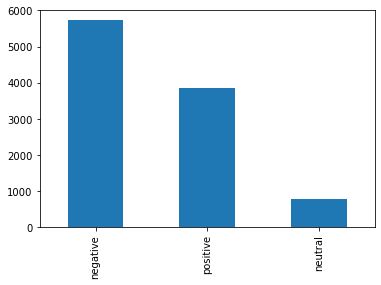

In [285]:
df['sentiment_label'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='year', ylabel='sentiment'>

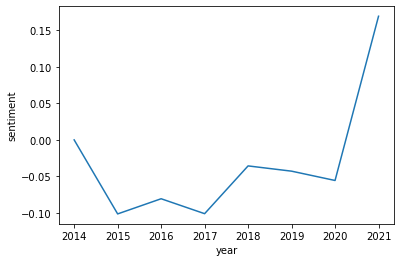

In [286]:
df['year'] = df['date'].dt.year.drop(2021)
sns.lineplot(data = df, x = 'year', y = 'sentiment', ci = None)

# Narrative
+ It seems Trump had lowest scoring sentiments in 2015 and 2017

<AxesSubplot:xlabel='year', ylabel='sentiment'>

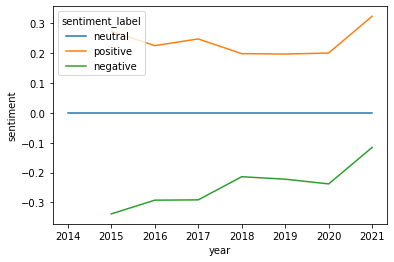

In [287]:
sns.lineplot(data = df, x = 'year', y = 'sentiment', ci = None, hue = 'sentiment_label')

In [176]:
# Easy to say that Trump's time on twitter has mostly been negative. Of course, this is the insults after all.

In [288]:
mean_tweets = df[(df['sentiment'] <=-0.07) & (df['sentiment_label'] == 'negative')]

In [289]:
mean_tweets

date              target  \
6     2015-06-25        willie-geist   
14    2015-06-25  lawrence-o-donnell   
15    2015-06-25  lawrence-o-donnell   
16    2015-06-25          rick-scott   
17    2015-06-26        john-roberts   
...          ...                 ...   
10344 2021-01-03                 cdc   
10347 2021-01-04         republicans   
10348 2021-01-04         republicans   
10354 2021-01-06          mike-pence   
10357 2021-01-06       2020-election   

                                                  insult  \
6                                  uncomfortable looking   
14                                dopey political pundit   
15                one of the dumber people on television   
16                       did really poorly on television   
17                                           let us down   
...                                                  ...   
10344                                         ridiculous   
10347                                 'Surrender Caucus'   
10348  weak and ineffective ,  willing to accept the ...   
10354  didn’t have the courage to do what should have...   
10357  Our Election Process is worse than that of thi...   

                                                   tweet    year  sentiment  \
6      Uncomfortable looking NBC reporter Willie Geis...  2015.0  -0.170000   
14     I hear that dopey political pundit, Lawrence O...  2015.0  -0.350000   
15     I hear that dopey political pundit, Lawrence O...  2015.0  -0.350000   
16     Governor Rick Scott of Florida did really poor...  2015.0  -0.400000   
17     Once again the Bush appointed Supreme Court Ju...  2015.0  -0.305642   
...                                                  ...     ...        ...   
10344  The number of cases and deaths of the China Vi...  2021.0  -0.097917   
10347  The “Surrender Caucus” within the Republican P...  2021.0  -0.072685   
10348  The “Surrender Caucus” within the Republican P...  2021.0  -0.072685   
10354  Mike Pence didn’t have the courage to do what ...  2021.0  -0.208333   
10357  They just happened to find 50,000 ballots late...  2021.0  -0.175000   

      sentiment_label  
6            negative  
14           negative  
15           negative  
16           negative  
17           negative  
...               ...  
10344        negative  
10347        negative  
10348        negative  
10354        negative  
10357        negative  

[4749 rows x 7 columns]

In [290]:
mean_tweets['insult'].value_counts()

Fake News                                  239
Crooked                                     99
failing                                     37
Sleepy Joe                                  34
FAKE NEWS                                   33
                                          ... 
total Republican hit job                     1
knowingly wrong on almost every fact         1
very dumb and failing                        1
a sick joke!                                 1
false statements at his news conference      1
Name: insult, Length: 3239, dtype: int64

In [291]:
mean_tweets['insult'].value_counts().nlargest(20)

Fake News               239
Crooked                  99
failing                  37
Sleepy Joe               34
FAKE NEWS                33
Fake News Media          32
Witch Hunt               28
Crooked Hillary          24
Fake                     24
dishonest                23
Corrupt                  23
Failing                  21
Crazy Nancy              19
Mini Mike                18
corrupt                  18
Sad!                     17
Impeachment Hoax         16
Do Nothing Democrats     16
Lamestream Media         14
Fake News!               14
Name: insult, dtype: int64

<AxesSubplot:>

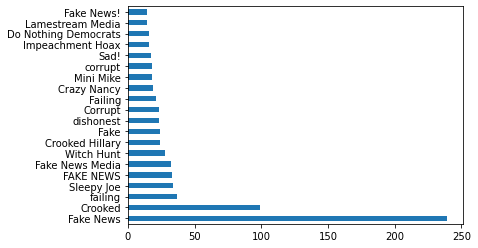

In [292]:
mean_tweets['insult'].value_counts().nlargest(20).plot(kind = 'barh')

In [293]:
df.head()

date          target  \
0 2014-10-09  thomas-frieden   
1 2014-10-09  thomas-frieden   
2 2015-06-16     politicians   
3 2015-06-24      ben-cardin   
4 2015-06-24      neil-young   

                                              insult  \
0                                               fool   
1                                               DOPE   
2                             all talk and no action   
3  It's politicians like Cardin that have destroy...   
4                                    total hypocrite   

                                               tweet    year  sentiment  \
0  Can you believe this fool, Dr. Thomas Frieden ...  2014.0     0.0000   
1  Can you believe this fool, Dr. Thomas Frieden ...  2014.0     0.0000   
2  Big time in U.S. today - MAKE AMERICA GREAT AG...  2015.0     0.2375   
3  Politician @SenatorCardin didn't like that I s...  2015.0     0.0000   
4  For the nonbeliever, here is a photo of @Neily...  2015.0     0.0000   

  sentiment_label  
0         neutral  
1         neutral  
2        positive  
3         neutral  
4         neutral

### Word blob for tweets with the lowest sentiment score, mostly his darker days in 2015 and 2017

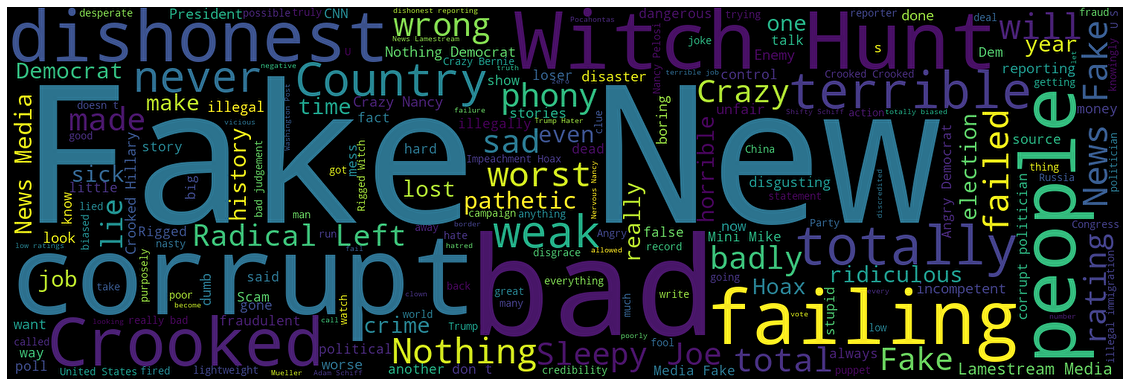

In [294]:
meantxt = " ".join(mean_tweets.insult)

wordcloud = WordCloud(width = 1500, height = 500).generate(meantxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()

In [ ]:
# Insults above with a sentiment rating of -0.07

In [295]:
lighter_insults = df[(df['sentiment'] >=-0.05) & (df['sentiment_label'] == 'negative')]

In [296]:
lighter_insults

date              target                               insult  \
8     2015-06-25          molly-sims                           a disaster   
9     2015-06-25      nicole-wallace                           a disaster   
10    2015-06-25            the-view                            dead T.V.   
11    2015-06-25            the-view                      put it to sleep   
138   2015-07-23     weekly-standard  small and slightly failing magazine   
...          ...                 ...                                  ...   
10236 2020-12-14       2020-election                      Rigged Election   
10245 2020-12-16         chris-krebs  totally excoriated and proven wrong   
10248 2020-12-16       2020-election                        Massive FRAUD   
10343 2021-01-03  brad-raffensperger                         has no clue!   
10359 2021-01-06          chuck-todd          Sleepy Eyes,  Sad to watch!   

                                                   tweet    year  sentiment  \
8      The ratings for The View are really low. Nicol...  2015.0  -0.021212   
9      The ratings for The View are really low. Nicol...  2015.0  -0.021212   
10     The ratings for The View are really low. Nicol...  2015.0  -0.021212   
11     The ratings for The View are really low. Nicol...  2015.0  -0.021212   
138    .@BillKristol Bill, your small and slightly fa...  2015.0  -0.023333   
...                                                  ...     ...        ...   
10236  “Why did the Swing States stop counting in the...  2020.0  -0.015278   
10245  Chris Krebs was totally excoriated and proven ...  2020.0  -0.015000   
10248  Chris Krebs was totally excoriated and proven ...  2020.0  -0.015000   
10343  I spoke to Secretary of State Brad Raffensperg...  2021.0  -0.018750   
10359  Sleepy Eyes Chuck Todd is so happy with the fa...  2021.0  -0.031250   

      sentiment_label  
8            negative  
9            negative  
10           negative  
11           negative  
138          negative  
...               ...  
10236        negative  
10245        negative  
10248        negative  
10343        negative  
10359        negative  

[698 rows x 7 columns]

In [297]:
lighter_insults['insult'].value_counts()

Fake News            35
Crooked              13
Crooked Hillary      13
Sleepy Joe            9
Fake News Media       7
                     ..
LIE                   1
going ‘nuts.’         1
blew DACA             1
he got thrown out     1
a total JOKE          1
Name: insult, Length: 567, dtype: int64

<AxesSubplot:>

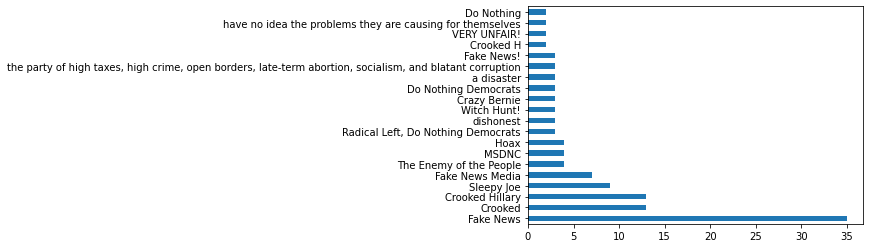

In [298]:
lighter_insults['insult'].value_counts().nlargest(20).plot(kind = 'barh')

In [299]:
lighter_insults['target'].value_counts()

the-media              103
democrats               49
hillary-clinton         36
trump-russia            31
joe-biden               29
                      ... 
2020-dem-candidates      1
levar-ball               1
dominion-voting          1
evan-mcmullin            1
politico                 1
Name: target, Length: 172, dtype: int64

<AxesSubplot:>

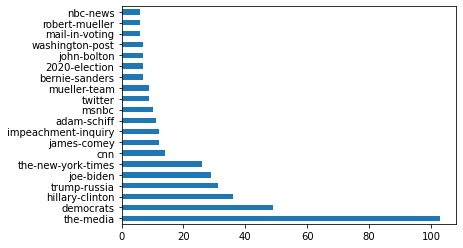

In [300]:
lighter_insults['target'].value_counts().nlargest(20).plot(kind = 'barh')

### Word blob for insults that aren't below the belt and a low negative score

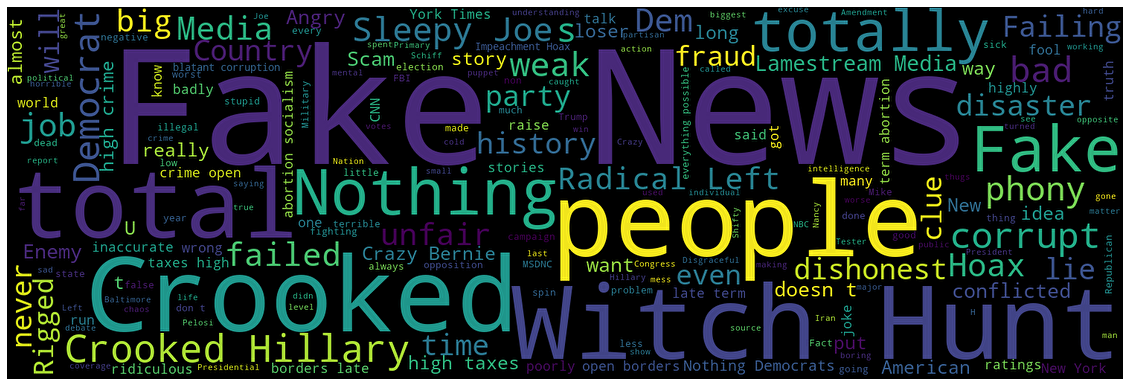

In [301]:
lighttxt = " ".join(lighter_insults.insult)

wordcloud = WordCloud(width = 1500, height = 500).generate(lighttxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()

In [302]:
Pos_tweet = df[(df['sentiment'] >=0.01) & (df['sentiment_label'] == 'positive')]

In [303]:
Pos_tweet

date                    target  \
2     2015-06-16               politicians   
5     2015-06-24  rockin-in-the-free-world   
7     2015-06-25                  jeb-bush   
12    2015-06-25            nicole-wallace   
13    2015-06-25                  the-view   
...          ...                       ...   
10352 2021-01-05                    antifa   
10353 2021-01-05                 democrats   
10355 2021-01-06             2020-election   
10356 2021-01-06             2020-election   
10358 2021-01-06             2020-election   

                                                  insult  \
2                                 all talk and no action   
5                                         didn't love it   
7                    will NEVER Make America Great Again   
12                                   doesn't have a clue   
13                                        close to death   
...                                                  ...   
10352                           a Terrorist Organization   
10353                  emboldened Radical Left Democrats   
10355  Many States want to decertify the mistake they...   
10356  based on irregularities and fraud, plus corrup...   
10358                                            a FRAUD   

                                                   tweet    year  sentiment  \
2      Big time in U.S. today - MAKE AMERICA GREAT AG...  2015.0   0.237500   
5      .@Neilyoung’s song, “Rockin’ In The Free World...  2015.0   0.450000   
7      Just out, the new nationwide @FoxNews poll has...  2015.0   0.184091   
12     .@WhoopiGoldberg had better surround herself w...  2015.0   0.562500   
13     .@WhoopiGoldberg had better surround herself w...  2015.0   0.562500   
...                                                  ...     ...        ...   
10352  Antifa is a Terrorist Organization, stay out o...  2021.0   0.250000   
10353  Washington is being inundated with people who ...  2021.0   0.375000   
10355  If Vice President @Mike_Pence comes through fo...  2021.0   0.433333   
10356  States want to correct their votes, which they...  2021.0   0.035938   
10358  The States want to redo their votes. They foun...  2021.0   0.541667   

      sentiment_label  
2            positive  
5            positive  
7            positive  
12           positive  
13           positive  
...               ...  
10352        positive  
10353        positive  
10355        positive  
10356        positive  
10358        positive  

[3744 rows x 7 columns]

In [304]:
Pos_tweet['insult'].value_counts()

Fake News                                                  123
Crooked                                                     90
Sleepy Joe                                                  69
failing                                                     32
Witch Hunt                                                  32
                                                          ... 
No imagination!                                              1
totally compromised and conflicted,  Witch Hunt              1
all he can do is be a spoiler, never a nice thing to do      1
Democrat Scam                                                1
should not have been authorized in the first place           1
Name: insult, Length: 2667, dtype: int64

<AxesSubplot:>

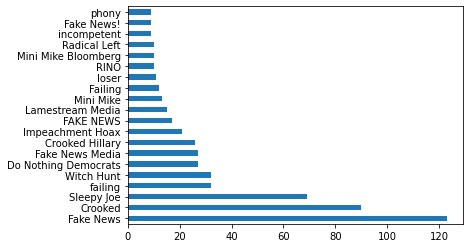

In [305]:
Pos_tweet['insult'].value_counts().nlargest(20).plot(kind = 'barh')

In [306]:
Pos_tweet['target'].value_counts()

the-media          401
democrats          295
hillary-clinton    178
joe-biden          164
trump-russia       160
                  ... 
ken-frazier          1
kate-brown           1
palestine            1
nasa                 1
mika-brzezinski      1
Name: target, Length: 505, dtype: int64

<AxesSubplot:>

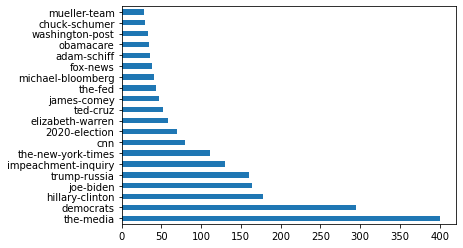

In [307]:
Pos_tweet['target'].value_counts().nlargest(20).plot(kind = 'barh')

In [308]:
Pos_tweet['tweet']

2        Big time in U.S. today - MAKE AMERICA GREAT AG...
5        .@Neilyoung’s song, “Rockin’ In The Free World...
7        Just out, the new nationwide @FoxNews poll has...
12       .@WhoopiGoldberg had better surround herself w...
13       .@WhoopiGoldberg had better surround herself w...
                               ...                        
10352    Antifa is a Terrorist Organization, stay out o...
10353    Washington is being inundated with people who ...
10355    If Vice President @Mike_Pence comes through fo...
10356    States want to correct their votes, which they...
10358    The States want to redo their votes. They foun...
Name: tweet, Length: 3744, dtype: object

In [309]:
Pos_tweet.iloc[0]['tweet']

'Big time in U.S. today - MAKE AMERICA GREAT AGAIN! Politicians are all talk and no action - they can never bring us back.'

In [310]:
Pos_tweet.iloc[1]['tweet']

'.@Neilyoung’s song, “Rockin’ In The Free World” was just one of 10 songs used as background music. Didn’t love it anyway.'

In [311]:
Pos_tweet.iloc[2]['tweet']

'Just out, the new nationwide @FoxNews poll has me alone in 2nd place, closely behind Jeb Bush-but Bush will NEVER Make America Great Again!'

In [312]:
Pos_tweet.iloc[3]['tweet']

".@WhoopiGoldberg had better surround herself with better hosts than Nicole Wallace, who doesn't have a clue. The show is close to death!"

In [313]:
Pos_tweet.iloc[4]['tweet']

".@WhoopiGoldberg had better surround herself with better hosts than Nicole Wallace, who doesn't have a clue. The show is close to death!"

### Word blob for insults that have a positive sentiment

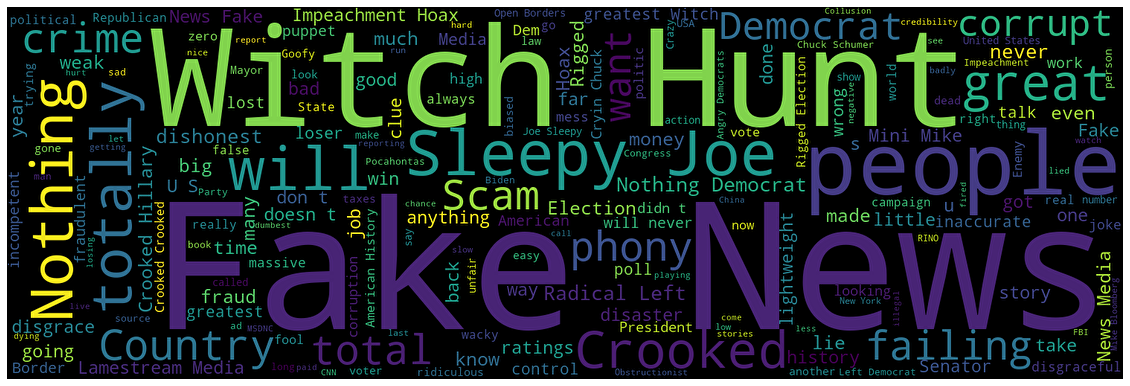

In [314]:
Postxt = " ".join(Pos_tweet.insult)

wordcloud = WordCloud(width = 1500, height = 500).generate(Postxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()

In [315]:
Nice_tweet = df[(df['sentiment'] >=0.4) & (df['sentiment_label'] == 'positive')]

In [316]:
Nice_tweet

date                    target  \
5     2015-06-24  rockin-in-the-free-world   
12    2015-06-25            nicole-wallace   
13    2015-06-25                  the-view   
19    2015-06-26              john-roberts   
23    2015-06-29              saudi-arabia   
...          ...                       ...   
10333 2021-01-01                john-thune   
10334 2021-01-01             2020-election   
10339 2021-01-02             2020-election   
10355 2021-01-06             2020-election   
10358 2021-01-06             2020-election   

                                                  insult  \
5                                         didn't love it   
12                                   doesn't have a clue   
13                                        close to death   
19     my judicial appointments will do the right thi...   
23                                     without us, gone!   
...                                                  ...   
10333                                               RINO   
10334                                         fraudulent   
10339                An attempt to steal a landslide win   
10355  Many States want to decertify the mistake they...   
10358                                            a FRAUD   

                                                   tweet    year  sentiment  \
5      .@Neilyoung’s song, “Rockin’ In The Free World...  2015.0   0.450000   
12     .@WhoopiGoldberg had better surround herself w...  2015.0   0.562500   
13     .@WhoopiGoldberg had better surround herself w...  2015.0   0.562500   
19     If I win the presidency, my judicial appointme...  2015.0   0.542857   
23     Saudi Arabia should be paying the United State...  2015.0   0.625000   
...                                                  ...     ...        ...   
10333  I hope to see the great Governor of South Dako...  2021.0   0.468333   
10334  Sen. Josh Hawley Slams Walmart Tweet Calling H...  2021.0   0.712500   
10339  An attempt to steal a landslide win. Can’t let...  2021.0   1.000000   
10355  If Vice President @Mike_Pence comes through fo...  2021.0   0.433333   
10358  The States want to redo their votes. They foun...  2021.0   0.541667   

      sentiment_label  
5            positive  
12           positive  
13           positive  
19           positive  
23           positive  
...               ...  
10333        positive  
10334        positive  
10339        positive  
10355        positive  
10358        positive  

[528 rows x 7 columns]

In [317]:
Nice_tweet.iloc[0]['tweet']

'.@Neilyoung’s song, “Rockin’ In The Free World” was just one of 10 songs used as background music. Didn’t love it anyway.'

In [318]:
Nice_tweet.iloc[1]['tweet']

".@WhoopiGoldberg had better surround herself with better hosts than Nicole Wallace, who doesn't have a clue. The show is close to death!"

In [319]:
Nice_tweet.iloc[2]['tweet']

".@WhoopiGoldberg had better surround herself with better hosts than Nicole Wallace, who doesn't have a clue. The show is close to death!"

In [320]:
Nice_tweet.iloc[3]['tweet']

"If I win the presidency, my judicial appointments will do the right thing unlike Bush's appointee John Roberts on ObamaCare."

In [321]:
Nice_tweet.iloc[4]['tweet']

'Saudi Arabia should be paying the United States many billions of dollars for our defense of them. Without us, gone! @AlWaleedbinT'

In [322]:
Nice_tweet['insult'].value_counts()

Sleepy Joe                                               14
failing                                                   8
Crooked                                                   7
Do Nothing Democrats                                      6
Impeachment Hoax                                          6
                                                         ..
Democrat Never Trumper lawyer                             1
will never be able to beat Hillary                        1
Do Nothing Democrats have disgraced our great Country     1
a big mistake                                             1
dues sucking union                                        1
Name: insult, Length: 448, dtype: int64

In [323]:
Nice_tweet['insult'].value_counts().nlargest(20)

Sleepy Joe                                                                  14
failing                                                                      8
Crooked                                                                      7
Do Nothing Democrats                                                         6
Impeachment Hoax                                                             6
Fake News                                                                    5
Witch Hunt                                                                   4
#FakeNews                                                                    3
Witch Hunt!                                                                  3
phony                                                                        3
tremendous leaking, lying and corruption at the highest levels               3
Radical Liberal                                                              3
a disaster                                          

<AxesSubplot:>

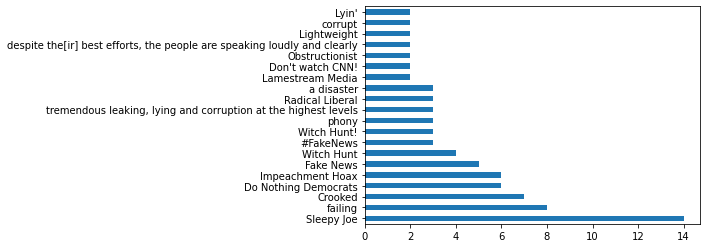

In [324]:
Nice_tweet['insult'].value_counts().nlargest(20).plot(kind = 'barh')

In [325]:
Nice_tweet['target'].value_counts()

democrats                   59
the-media                   33
joe-biden                   26
trump-russia                25
impeachment-inquiry         23
                            ..
lois-frankel                 1
rockin-in-the-free-world     1
h1n1-response                1
michael-flynn-case           1
abc-post-poll                1
Name: target, Length: 162, dtype: int64

In [326]:
Nice_tweet['target'].value_counts().nlargest(20)

democrats                59
the-media                33
joe-biden                26
trump-russia             25
impeachment-inquiry      23
2020-election            23
hillary-clinton          18
ted-cruz                 17
the-new-york-times       14
cnn                      10
elizabeth-warren          9
richard-blumenthal        7
james-comey               6
adam-schiff               5
fox-news                  5
omarosa-manigault         5
china                     5
obamacare                 5
karl-rove                 4
department-of-justice     4
Name: target, dtype: int64

<AxesSubplot:>

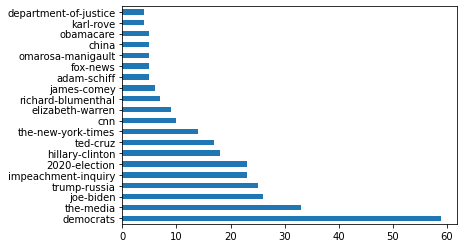

In [327]:
Nice_tweet['target'].value_counts().nlargest(20).plot(kind = 'barh')

### Word blob for insults with a sentiment greater than 0.4

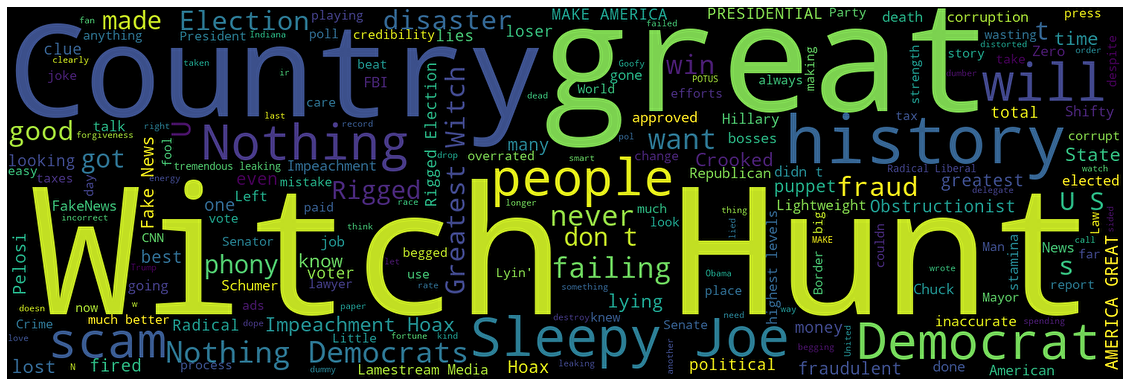

In [328]:
Nicetxt = " ".join(Nice_tweet.insult)

wordcloud = WordCloud(width = 1500, height = 500).generate(Nicetxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()

# Sentiment and tweets against his biggest targets

In [334]:
Democrat = df[df['target'] == 'democrats']

In [335]:
Democrat

date     target  \
691   2015-12-21  democrats   
1750  2016-07-24  democrats   
1787  2016-07-26  democrats   
2095  2016-10-11  democrats   
2149  2016-10-16  democrats   
...          ...        ...   
9994  2020-11-10  democrats   
10060 2020-11-16  democrats   
10195 2020-12-09  democrats   
10294 2020-12-24  democrats   
10353 2021-01-05  democrats   

                                                  insult  \
691    it's the Democrat's total weakness that is the...   
1750                                 in a total meltdown   
1787                                              Crazy!   
2095                      cheating Bernie out of the nom   
2149                           corrupt political machine   
...                                                  ...   
9994            didn’t want to have me get a Vaccine WIN   
10060                      trying to STEAL this Election   
10195                            cheated in the Election   
10294                          a crooked and vicious foe   
10353                  emboldened Radical Left Democrats   

                                                   tweet    year  sentiment  \
691    It's the Democrat's total weakness that is the...  2015.0   0.500000   
1750   The Democrats are in a total meltdown but the ...  2016.0   0.375000   
1787   In order to try and deflect the horror and stu...  2016.0  -0.675000   
2095   With the exception of cheating Bernie out of t...  2016.0   0.194271   
2149   The Democrats have a corrupt political machine...  2016.0  -0.166667   
...                                                  ...     ...        ...   
9994   The @US_FDA and the Democrats didn’t want to h...  2020.0   0.266667   
10060  The Radical Left Democrats, working with their...  2020.0  -0.312500   
10195  If somebody cheated in the Election, which the...  2020.0   0.000000   
10294  I saved at least 8 Republican Senators, includ...  2020.0  -0.216667   
10353  Washington is being inundated with people who ...  2021.0   0.375000   

      sentiment_label  
691          positive  
1750         positive  
1787         negative  
2095         positive  
2149         negative  
...               ...  
9994         positive  
10060        negative  
10195         neutral  
10294        negative  
10353        positive  

[647 rows x 7 columns]

In [368]:
Democrat.iloc[0]['tweet']

"It's the Democrat's total weakness that is the greatest recruiting tool of ISIS!!!"

In [367]:
get_sentiment(Democrat.iloc[0]['tweet'])

0.5

In [364]:
Democrat.iloc[1]['tweet']

'The Democrats are in a total meltdown but the biased media will say how great they are doing! E-mails say the rigged system is alive & well!'

In [369]:
get_sentiment(Democrat.iloc[1]['tweet'])

0.375

In [359]:
Democrat.iloc[2]['tweet']

'In order to try and deflect the horror and stupidity of the Wikileakes disaster, the Dems said maybe it is Russia dealing with Trump. Crazy!'

In [370]:
get_sentiment(Democrat.iloc[2]['tweet'])

-0.675

In [360]:
Democrat.iloc[3]['tweet']

'With the exception of cheating Bernie out of the nom the Dems have always proven to be far more loyal to each other than the Republicans!'

In [371]:
get_sentiment(Democrat.iloc[3]['tweet'])

0.19427083333333334

In [361]:
Democrat.iloc[4]['tweet']

'The Democrats have a corrupt political machine pushing crooked Hillary Clinton. We have Paul Ryan, always fighting the Republican nominee!'

In [372]:
get_sentiment(Democrat.iloc[4]['tweet'])

-0.16666666666666666

<AxesSubplot:>

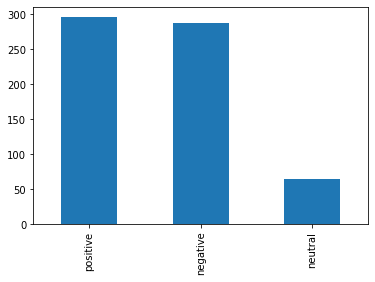

In [340]:
Democrat['sentiment_label'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='year', ylabel='sentiment'>

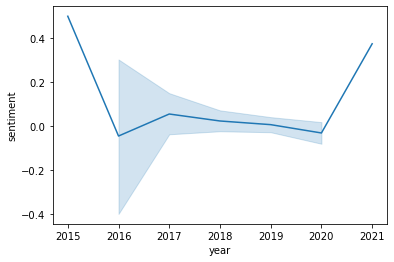

In [344]:
sns.lineplot(data = Democrat, x = 'year', y = 'sentiment')

In [345]:
Media = df[df['target'] == 'the-media']

In [346]:
Media

date     target  \
167   2015-07-29  the-media   
269   2015-09-21  the-media   
270   2015-09-21  the-media   
288   2015-09-24  the-media   
316   2015-10-04  the-media   
...          ...        ...   
10265 2020-12-20  the-media   
10266 2020-12-20  the-media   
10295 2020-12-25  the-media   
10310 2020-12-26  the-media   
10346 2021-01-03  the-media   

                                                  insult  \
167                                                 lies   
269                                    totally dishonest   
270                                              So sad!   
288    despite the[ir] best efforts, the people are s...   
316                                        troublemakers   
...                                                  ...   
10265                                          Fake News   
10266                           knowingly bad reporting!   
10295                                         Fake News!   
10310                                          Fake News   
10346                 LameStream Media ,  more Fake News   

                                                   tweet    year  sentiment  \
167    I truly LOVE all of the millions of people who...  2015.0   0.450000   
269    I am attracting the biggest crowds, by far, an...  2015.0   0.079167   
270    I am attracting the biggest crowds, by far, an...  2015.0   0.079167   
288    Despite the establishment and the media’s best...  2015.0   0.487500   
316    I'm leading by big margins in every poll but t...  2015.0   0.500000   
...                                                  ...     ...        ...   
10265  Martial law = Fake News. Just more knowingly b...  2020.0  -0.218750   
10266  Martial law = Fake News. Just more knowingly b...  2020.0  -0.218750   
10295  The greatest of all time. Fake News! https://t...  2020.0   0.187500   
10310  ....Courts are bad, the FBI and “Justice” didn...  2020.0  -0.250000   
10346  Something how Dr. Fauci is revered by the Lame...  2021.0   0.257143   

      sentiment_label  
167          positive  
269          positive  
270          positive  
288          positive  
316          positive  
...               ...  
10265        negative  
10266        negative  
10295        positive  
10310        negative  
10346        positive  

[1287 rows x 7 columns]

In [374]:
Media.iloc[0]['tweet']

'I truly LOVE all of the millions of people who are sticking with me despite so many media lies. There is a great SILENT MAJORITY looming!'

In [375]:
get_sentiment(Media.iloc[0]['tweet'])

0.45

In [376]:
Media.iloc[1]['tweet']

'I am attracting the biggest crowds, by far, and the best poll numbers, also by far. Much of the media is totally dishonest. So sad!'

In [377]:
get_sentiment(Media.iloc[1]['tweet'])

0.07916666666666668

In [378]:
Media.iloc[2]['tweet']

'I am attracting the biggest crowds, by far, and the best poll numbers, also by far. Much of the media is totally dishonest. So sad!'

In [380]:
get_sentiment(Media.iloc[2]['tweet'])

0.07916666666666668

In [ ]:
Media.iloc[3]['tweet']

In [381]:
get_sentiment(Media.iloc[3]['tweet'])

0.48750000000000004

In [387]:
Media.iloc[21]['tweet']

'Amazingly, with all of the money I have raised for the vets, I have got nothing but bad publicity from the dishonest and disgusting media.'

In [386]:
get_sentiment(Media.iloc[21]['tweet'])

-0.3499999999999999

<AxesSubplot:>

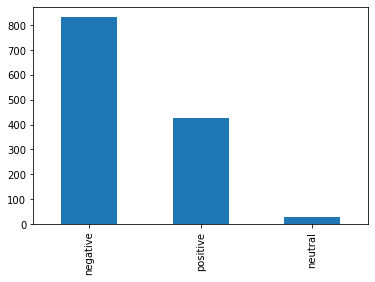

In [347]:
Media['sentiment_label'].value_counts().plot(kind = 'bar') # Ok he really hates the media

<AxesSubplot:xlabel='year', ylabel='sentiment'>

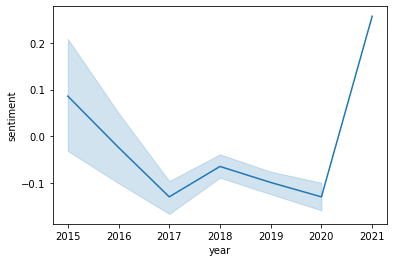

In [348]:
sns.lineplot(data = Media, x = 'year', y = 'sentiment')

In [352]:
Biden = df[df['target'] == 'joe-biden']

In [353]:
Biden

date     target  \
1802  2016-07-27  joe-biden   
3646  2018-03-22  joe-biden   
3647  2018-03-22  joe-biden   
3648  2018-03-22  joe-biden   
3649  2018-03-22  joe-biden   
...          ...        ...   
9975  2020-11-03  joe-biden   
10080 2020-11-21  joe-biden   
10081 2020-11-21  joe-biden   
10222 2020-12-12  joe-biden   
10311 2020-12-26  joe-biden   

                                                  insult  \
1802                                     not very bright   
3646                                           Crazy Joe   
3647                      trying to act like a tough guy   
3648   Actually, he is weak, both mentally and physic...   
3649   He doesn’t know me, but he would go down fast ...   
...                                                  ...   
9975                                          Sleepy Joe   
10080    a total disaster in handling the H1N1 Swine Flu   
10081        would do a terrible job of Vaccine delivery   
10222                                              lying   
10311                                    Fake President!   

                                                   tweet    year  sentiment  \
1802   Our not very bright Vice President, Joe Biden,...  2016.0  -0.447115   
3646   Crazy Joe Biden is trying to act like a tough ...  2018.0  -0.178283   
3647   Crazy Joe Biden is trying to act like a tough ...  2018.0  -0.178283   
3648   Crazy Joe Biden is trying to act like a tough ...  2018.0  -0.178283   
3649   Crazy Joe Biden is trying to act like a tough ...  2018.0  -0.178283   
...                                                  ...     ...        ...   
9975   A vote for Sleepy Joe Biden is a vote to give ...  2020.0   0.625000   
10080  Joe Biden was a total disaster in handling the...  2020.0  -0.500000   
10081  Joe Biden was a total disaster in handling the...  2020.0  -0.500000   
10222  Why didn’t Bill Barr reveal the truth to the p...  2020.0  -0.025000   
10311  A young military man working in Afghanistan to...  2020.0   0.041667   

      sentiment_label  
1802         negative  
3646         negative  
3647         negative  
3648         negative  
3649         negative  
...               ...  
9975         positive  
10080        negative  
10081        negative  
10222        negative  
10311        positive  

[402 rows x 7 columns]

In [388]:
Biden.iloc[0]['tweet']

'Our not very bright Vice President, Joe Biden, just stated that I wanted to "carpet bomb" the enemy. Sorry Joe, that was Ted Cruz!'

In [389]:
get_sentiment(Biden.iloc[0]['tweet'])

-0.4471153846153846

In [390]:
Biden.iloc[1]['tweet']

'Crazy Joe Biden is trying to act like a tough guy. Actually, he is weak, both mentally and physically, and yet he threatens me, for the second time, with physical assault. He doesn’t know me, but he would go down fast and hard, crying all the way. Don’t threaten people Joe!'

In [391]:
get_sentiment(Biden.iloc[0]['tweet'])

-0.4471153846153846

In [ ]:
Biden.iloc[2]['tweet']

In [393]:
get_sentiment(Biden.iloc[2]['tweet'])

-0.17828282828282832

In [394]:
Biden.iloc[3]['tweet']

'Crazy Joe Biden is trying to act like a tough guy. Actually, he is weak, both mentally and physically, and yet he threatens me, for the second time, with physical assault. He doesn’t know me, but he would go down fast and hard, crying all the way. Don’t threaten people Joe!'

In [395]:
get_sentiment(Biden.iloc[3]['tweet'])

-0.17828282828282832

In [396]:
Biden.iloc[4]['tweet']

'Crazy Joe Biden is trying to act like a tough guy. Actually, he is weak, both mentally and physically, and yet he threatens me, for the second time, with physical assault. He doesn’t know me, but he would go down fast and hard, crying all the way. Don’t threaten people Joe!'

In [397]:
get_sentiment(Biden.iloc[4]['tweet'])

-0.17828282828282832

<AxesSubplot:>

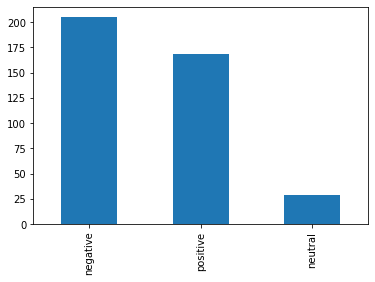

In [354]:
Biden['sentiment_label'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='year', ylabel='sentiment'>

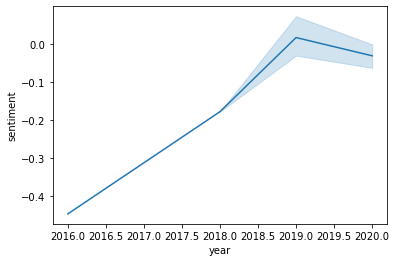

In [355]:
sns.lineplot(data = Biden, x = 'year', y = 'sentiment')

### Word Blob for his biggest enemy the media

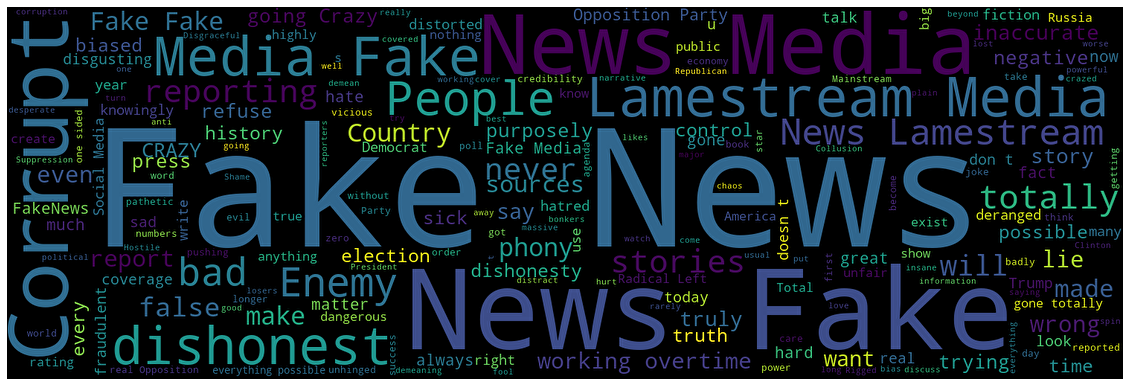

In [349]:
Mediatxt = " ".join(Media.insult)

wordcloud = WordCloud(width = 1500, height = 500).generate(Mediatxt)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()

### Word Blob for Democrats

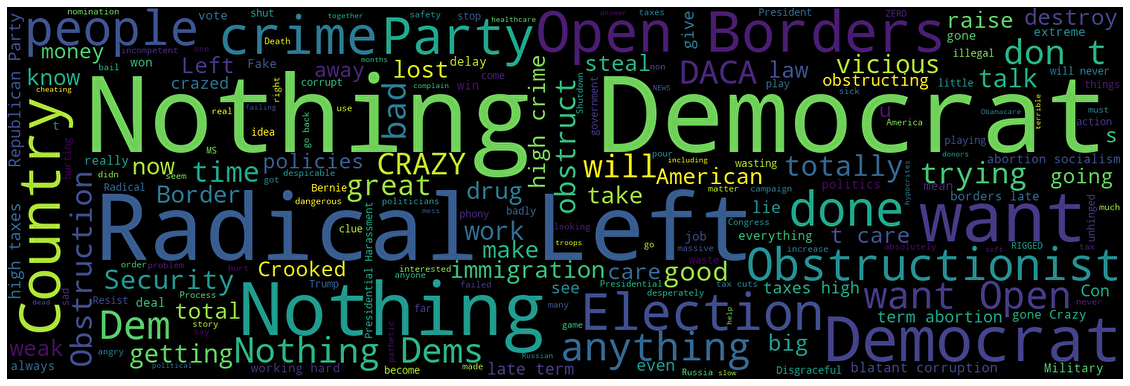

In [350]:
Dem = " ".join(Democrat.insult)

wordcloud = WordCloud(width = 1500, height = 500).generate(Dem)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()

### Word Blob for Biden

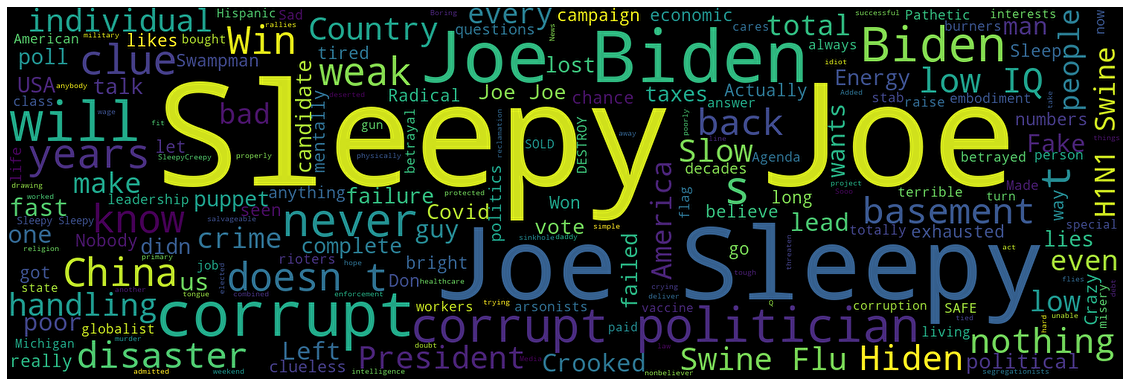

In [356]:
Bi = " ".join(Biden.insult)

wordcloud = WordCloud(width = 1500, height = 500).generate(Bi)

plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation = 'sinc')
plt.axis("off")
plt.show()

# Conclusion
+ He doesn't have very nice things to say